## Group Members
1. Shouq Almutairi      440021077
1. Raghad Alateeq       440021987
1. Reem Alqahtani       440019278
1. Reema Alomran        440019606

## Import Libraries 

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz 

# Load Dataset 

In [2]:
data = pd.read_csv('heart(1).csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Divide data into Dependent and Independent Variables

In [3]:
#Get Target data 
y = data['target']

#Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['target'], axis = 1)

# Divide Data into Train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Build Basic Decision Tree Model

In [5]:
#in order to avoid overfitting we chose to add a max depth
DT_Model = DecisionTreeClassifier(max_depth = 3)

In [6]:
DT_Model.fit(X_train,y_train)
prediction = DT_Model.predict(X_test)

## Check Accuracy

In [7]:
print (f'Train Accuracy - : {DT_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {DT_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.854
Test Accuracy - : 0.813


# Plot Tree

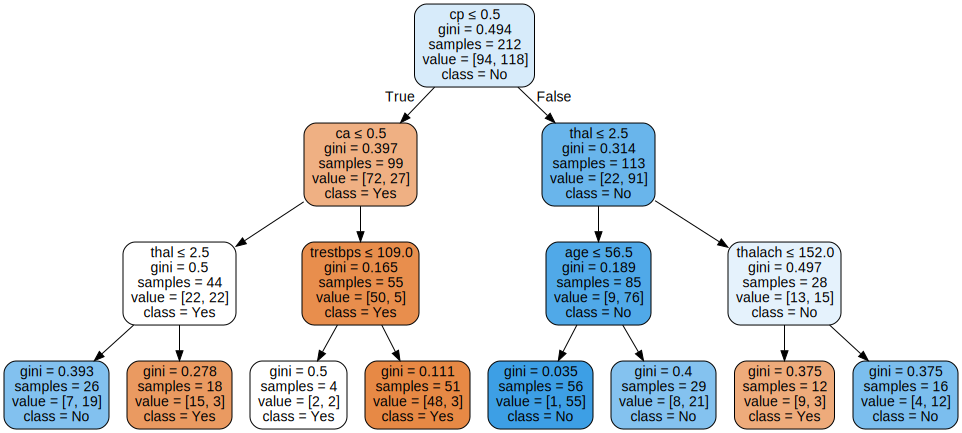

In [8]:
dot_data = export_graphviz(DT_Model, max_depth = 3,  #Limit to a Depth of 3 only
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=['Yes','No'],          # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Confusion Matrix

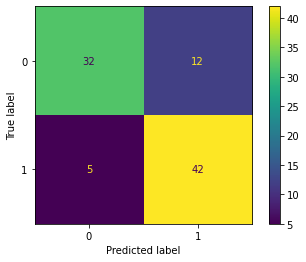

In [9]:
cm=confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=DT_Model.classes_)
disp.plot()

# END